In [ ]:
!pip install ppscore
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
from ppscore import score as pps
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = "/content/adult_with_headers.csv"
df = pd.read_csv(data_path)
# Basic data exploration
print("Dataset Overview:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe(include="all"))
print("\nMissing Values:")
print(df.isnull().sum())
# Handle missing values
df.fillna(method='ffill', inplace=True)  # Forward fill for missing values
# Apply scaling techniques
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Standard Scaling
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = scaler_standard.fit_transform(df[numerical_features])

# Min-Max Scaling
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])
print("\nStandard Scaled Data (First 5 Rows):")
print(df_standard_scaled.head())
print("\nMin-Max Scaled Data (First 5 Rows):")
print(df_minmax_scaled.head())
# Apply One-Hot Encoding
categorical_features = df.select_dtypes(include=["object"]).columns
one_hot_encoded_columns = [col for col in categorical_features if df[col].nunique() <= 5]
df_one_hot_encoded = pd.get_dummies(df, columns=one_hot_encoded_columns, drop_first=True)
# Apply Label Encoding
label_encoder = LabelEncoder()
label_encoded_columns = [col for col in categorical_features if df[col].nunique() > 5]
df_label_encoded = df.copy()
for col in label_encoded_columns:
    df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])
print("\nData after One-Hot Encoding:")
print(df_one_hot_encoded.head())
print("\nData after Label Encoding:")
print(df_label_encoded.head())
# Create new features
df["age_bins"] = pd.cut(df["age"], bins=[0, 25, 50, 75, 100], labels=["Young", "Middle", "Senior", "Elderly"])
df["hours_per_week_category"] = pd.cut(df["hours_per_week"], bins=[0, 20, 40, 60, 100], labels=["Part-Time", "Full-Time", "Over-Time", "Excessive-Time"])
# Apply log transformation to a skewed feature
df["log_capital_gain"] = np.log1p(df["capital_gain"])
print("\nNew Features Added:")
print(df[["age_bins", "hours_per_week_category", "log_capital_gain"]].head())
# Outlier Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(df.select_dtypes(include=["int64", "float64"]))
df_cleaned = df[outliers == 1
print("\nDataset after Outlier Removal:")
print(df_cleaned.shape)

Dataset Overview:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   Un

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

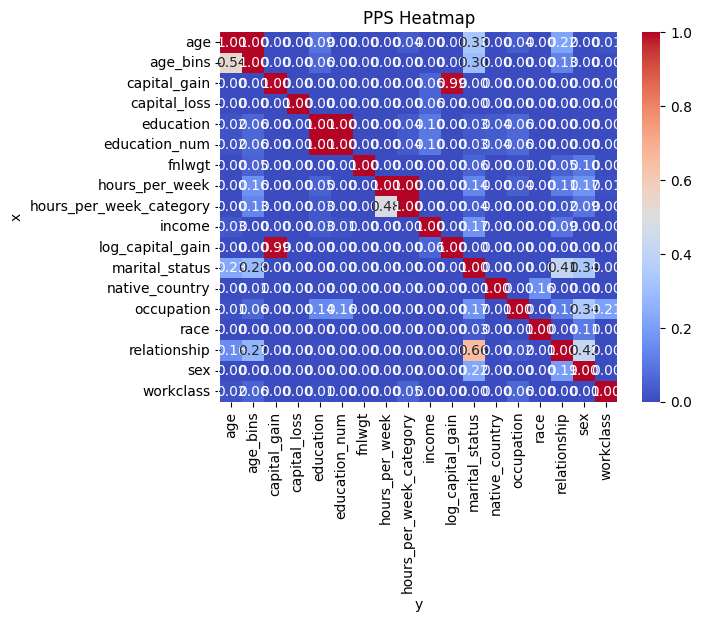

PPS for 'age' predicting 'income': {'x': 'age', 'y': 'income', 'ppscore': 1.4433071024069736e-07, 'case': 'classification', 'is_valid_score': True, 'metric': 'weighted F1', 'baseline_score': 0.7169245538188671, 'model_score': 0.7169245946753473, 'model': DecisionTreeClassifier()}


In [ ]:
import ppscore as pps
# Calculate PPS for all feature pairs
pps_matrix = pps.matrix(df_cleaned)
# Display the PPS matrix
pps_heatmap = pps_matrix.pivot("x", "y", "ppscore")
sns.heatmap(pps_heatmap, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("PPS Heatmap")
plt.show()
# Example
pps_value = pps.score(df_cleaned, "age", "income")
print(f"PPS for 'age' predicting 'income': {pps_value}")

<ipython-input-6-c59055a8fb7d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


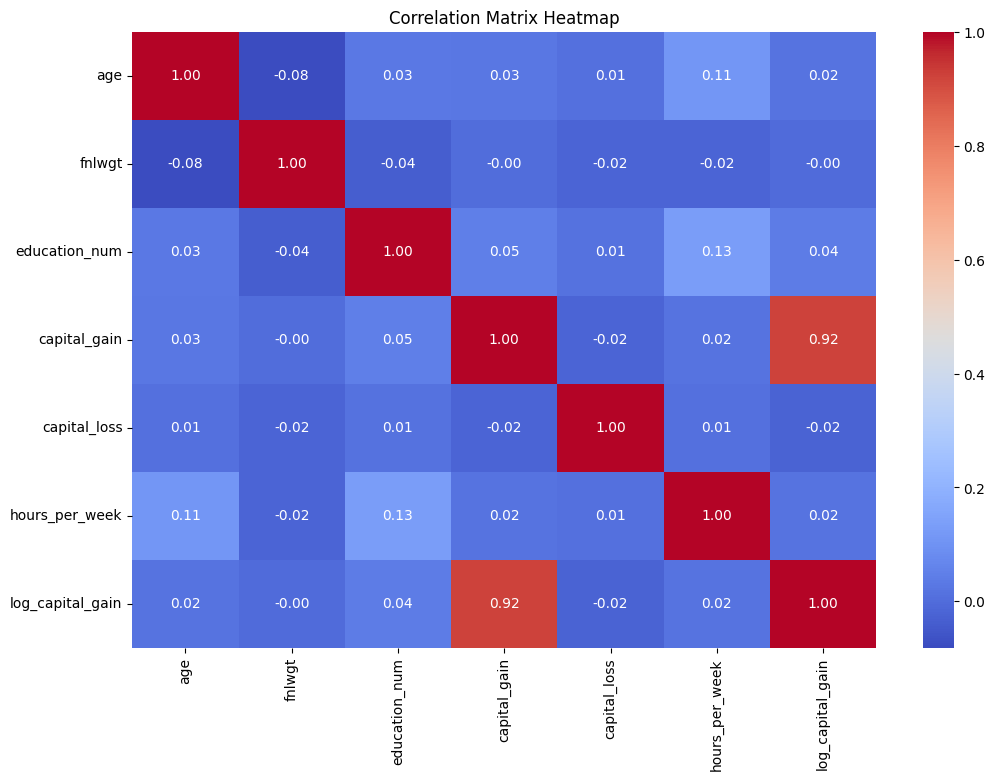

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()
# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()